In [1]:
# Importing libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [2]:
# Visualizing 6 decimals per value
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Reading data from csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

sensorama = load_dataset('sensorama_df.csv')

In [3]:
# Since odor name and canonical_smiles variables are strings, we change them to a numerical value
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['canonical_smiles'])
sensorama['canonical_smiles']= label_encoder.transform(sensorama['canonical_smiles'])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['odor name'])
sensorama['odor name']= label_encoder.transform(sensorama['odor name'])

In [4]:
# Normalizing function
def standarize(x_train):
    mean = x_train.mean()
    std = x_train.std()
    x_train -= mean
    x_train /= std

# Normalizing data
s= sensorama.columns
s=s.drop(['odor level', 'cid','canonical_smiles', 'odor name'])
for c in s:
    standarize(sensorama[c])
# After normalizing the data, we have NaNs values, so we change them to 0
sensorama=sensorama.fillna(0)

In [5]:
# Creating a new dataframe with only those molecules of odor level = 4
sensorama_7 = []
for i in range (0,17994):
    if sensorama.loc[i,'odor level'] == 7:
        sensorama_7.append(sensorama.loc[i,:])
sensorama_7 = pd.DataFrame(sensorama_7)

In [6]:
X = sensorama_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_7['odor name']

### ALL ODOR NAMES 

#### RANDOM FOREST

Accuracy:  0.975609756097561 %


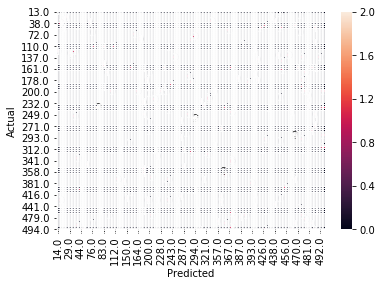

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

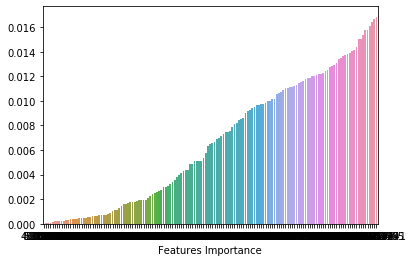

In [8]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [9]:
X = sensorama_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn','khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 
                 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_7['odor name']

Accuracy:  0.4878048780487805 %


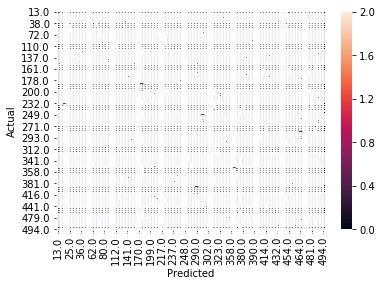

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [11]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 4.390243902439024 %


##### Polynomial Kernel


In [12]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 1.951219512195122 %


##### Sigmoid Kernel 

In [13]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 4.878048780487805 %


#### DECISION TREE

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 2.8455284552845526 %


#### LOGISTIC REGRESSION 

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  0.975609756097561 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

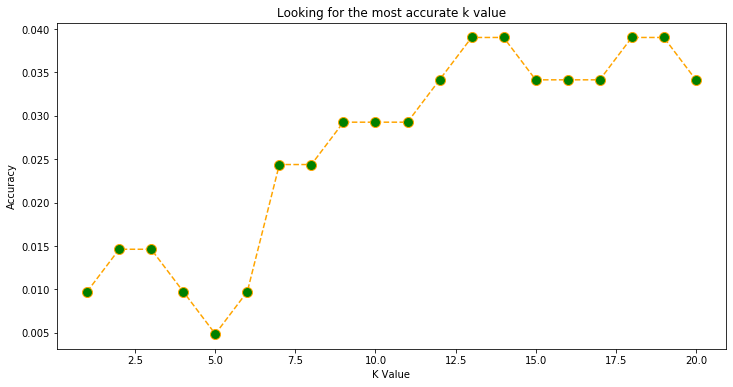

In [16]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [17]:
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 3.902439024390244 %


### 25 MOST COMMON ODOR NAMES 

In [22]:
sensorama_7 = sensorama_7.sort_values('odor name')

In [33]:
sensorama2_7=[]

for i in range(6 , len(sensorama_7)-6):
    if sensorama_7.iloc[i,4] == sensorama_7.iloc[i+6,4] or sensorama_7.iloc[i,4] == sensorama_7.iloc[i-6,4]:
        sensorama2_7.append(sensorama_7.iloc[i,:]) 

sensorama2_7= pd.DataFrame(sensorama2_7)
sensorama2_7

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
8875,91337.000000,923.000000,0.555287,7.000000,25.000000,1.012193,0.200130,-0.631781,0.632666,-0.644741,...,0.301495,0.384615,0.438469,0.000000,0.000000,0.327989,0.359197,0.078774,0.011890,-0.161598
16575,6951704.000000,916.000000,-0.557026,7.000000,25.000000,-1.268212,0.200130,1.183366,0.632666,1.285620,...,-0.113121,0.096307,-0.516508,0.000000,0.000000,-0.405350,-0.647635,-0.626199,-0.115391,-0.161598
7279,62445.000000,1963.000000,0.207689,7.000000,25.000000,0.978124,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.297735,0.047900,0.332360,0.000000,0.000000,0.146060,0.412908,0.129202,-0.183956,-0.161598
14789,5365699.000000,2157.000000,-0.348467,7.000000,25.000000,-0.051447,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.574145,-0.528183,-0.410399,0.000000,0.000000,-0.548453,0.008204,-0.218808,-0.596564,-0.161598
3307,12294.000000,2500.000000,0.346729,7.000000,25.000000,0.978124,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.481838,-0.192001,0.332360,0.000000,0.000000,0.146060,0.649749,0.367076,-0.172073,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,18458.000000,2076.000000,-0.974143,7.000000,494.000000,-0.519433,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.896453,-1.008518,-1.153159,0.000000,0.000000,-1.270918,-0.469363,-0.534622,-1.336265,5.273531
10334,110655.000000,543.000000,-0.417987,7.000000,494.000000,0.416540,3.434689,-0.631781,0.632666,-0.644741,...,0.485598,0.528769,0.120143,0.000000,0.000000,0.234213,-0.473735,-0.537040,0.111900,-0.161598
9233,95594.000000,1292.000000,-0.139908,7.000000,494.000000,-1.030100,0.200130,1.183366,0.632666,1.285620,...,-0.159019,-0.335622,-0.304291,0.000000,0.000000,-0.168470,-0.023370,-0.242851,0.110611,-0.161598
10575,113514.000000,1556.000000,0.068650,7.000000,494.000000,-0.519433,1.278317,1.183366,2.371507,1.285620,...,0.393802,0.288868,0.014035,0.000000,0.000000,0.151311,-0.278392,-0.420650,0.374837,-0.161598


In [34]:
count=0
for i in range(1, len(sensorama2_7)):
    if sensorama2_7.iloc[i,4]!= sensorama2_7.iloc[i-1,4]:
        count = count +1
print(count)

27


In [35]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

#### RANDOM FOREST

Accuracy:  7.6923076923076925 %


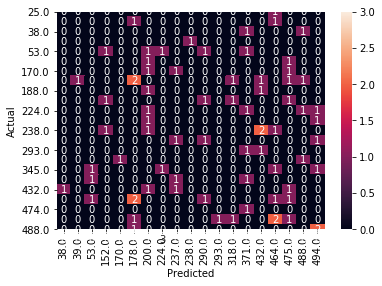

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

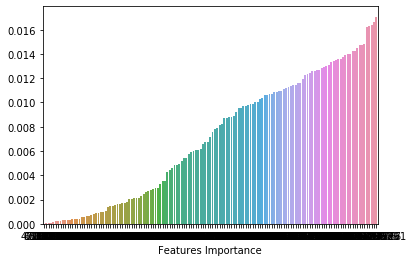

In [37]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [38]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                  'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

Accuracy:  7.6923076923076925 %


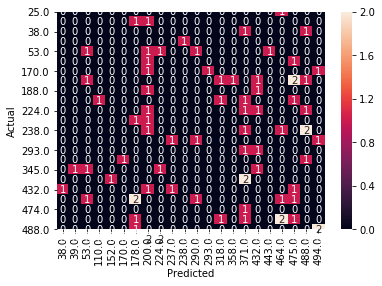

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [40]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 8.974358974358974 %


##### Polynomial Kernel


In [41]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 5.128205128205128 %


##### Sigmoid Kernel 

In [42]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 10.256410256410255 %


#### DECISION TREE

In [43]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 6.451612903225806 %


#### LOGISTIC REGRESSION 

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  6.41025641025641 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

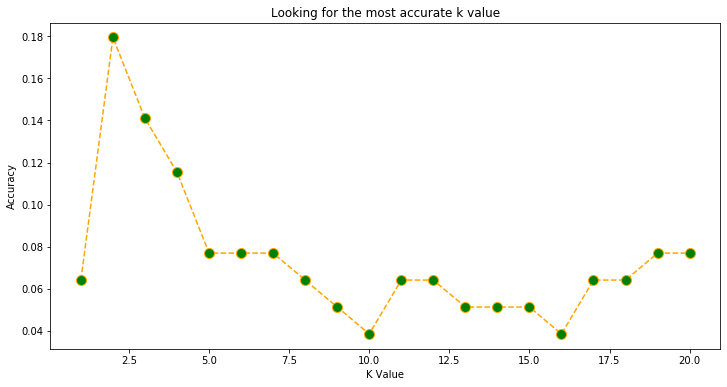

In [45]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [46]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 17.94871794871795 %


### 15 MOST COMMON ODOR NAMES 

In [47]:
sensorama_7 = sensorama_7 .sort_values('odor name')

In [51]:
sensorama2_7=[]

for i in range(10 , len(sensorama_7)-10):
    if sensorama_7.iloc[i,4] == sensorama_7.iloc[i+10,4] or sensorama_7.iloc[i,4] == sensorama_7.iloc[i-10,4]:
        sensorama2_7.append(sensorama_7.iloc[i,:]) 

sensorama2_7= pd.DataFrame(sensorama2_7)
sensorama2_7

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
14994,5367679.000000,2300.000000,0.624807,7.000000,53.000000,-0.207567,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.205428,0.096307,0.544577,0.000000,0.000000,0.509918,0.958273,0.714803,0.579522,-0.161598
4864,24433.000000,2992.000000,0.485768,7.000000,53.000000,-1.030100,0.200130,1.183366,0.632666,1.285620,...,0.646289,0.808038,0.014035,0.000000,0.000000,0.097063,-0.761927,-0.677375,0.445011,-0.161598
9145,94579.000000,1593.000000,0.485768,7.000000,53.000000,0.416540,0.200130,-0.631781,0.632666,-0.644741,...,0.623803,1.056978,0.544577,0.000000,0.000000,0.509918,0.356283,0.076074,0.263547,-0.161598
7112,62321.000000,2189.000000,0.902885,7.000000,53.000000,0.015569,-0.878056,-0.631781,-1.106175,-0.644741,...,0.669701,1.201132,1.181228,0.000000,0.000000,1.149470,1.241191,1.071355,1.062534,-0.161598
2168,8369.000000,1137.000000,-1.669339,7.000000,53.000000,-1.767273,0.200130,1.183366,0.632666,1.285620,...,-0.083669,-0.896871,-1.471484,0.000000,0.000000,-1.463711,-2.097547,-0.839553,-1.232447,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15107,5369997.000000,1153.000000,0.416248,7.000000,494.000000,0.015569,0.200130,-0.631781,0.632666,-0.644741,...,0.946622,0.673456,0.862903,0.000000,0.000000,0.928716,1.200804,1.018249,0.913268,-0.161598
888,7170.000000,3134.000000,-0.626545,7.000000,494.000000,-1.370420,0.200130,1.183366,0.632666,1.285620,...,0.439188,0.799923,-0.304291,0.000000,0.000000,-0.140519,-0.770393,-0.680931,0.263128,-0.161598
12760,605629.000000,609.000000,0.485768,7.000000,494.000000,-0.663573,0.200130,1.183366,0.632666,1.285620,...,0.716110,0.672923,0.438469,0.000000,0.000000,0.553994,0.114793,-0.134299,0.774314,-0.161598
14661,5364578.000000,2295.000000,-0.765585,7.000000,494.000000,-0.252119,-0.878056,-0.631781,-1.106175,-0.644741,...,-1.310557,-1.056392,-0.940942,0.000000,0.000000,-1.034038,-0.472347,-0.536270,-1.083044,-0.161598


In [52]:
count=0
for i in range(1, len(sensorama2_7)):
    if sensorama2_7.iloc[i,4]!= sensorama2_7.iloc[i-1,4]:
        count = count +1
print(count)

15


In [54]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

#### RANDOM FOREST

Accuracy:  12.76595744680851 %


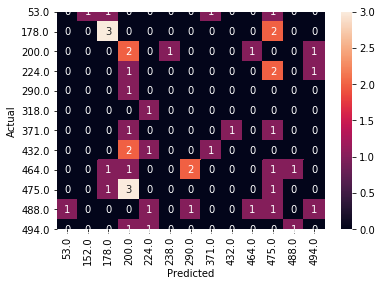

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

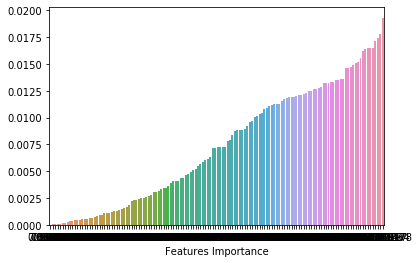

In [56]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [57]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

Accuracy:  14.893617021276595 %


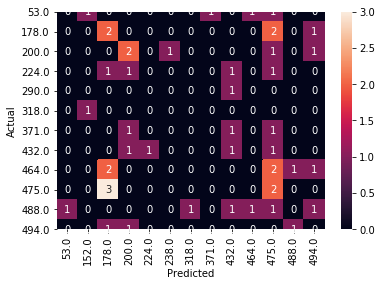

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [59]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 10.638297872340425 %


##### Polynomial Kernel


In [60]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 10.638297872340425 %


##### Sigmoid Kernel 

In [61]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 14.893617021276595 %


#### DECISION TREE

In [62]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 8.928571428571429 %


#### LOGISTIC REGRESSION 

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  31.914893617021278 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

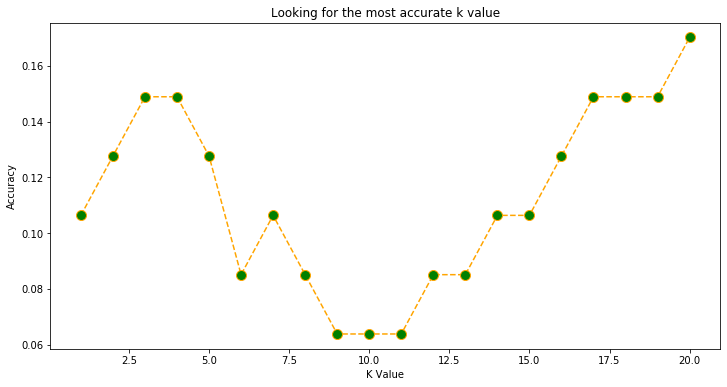

In [64]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [65]:
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 17.02127659574468 %


### 10 MOST COMMON ODOR NAMES 

In [65]:
sensorama_4 = sensorama_4.sort_values('odor name')

In [66]:
sensorama2_7=[]

for i in range(12 , len(sensorama_7)-12):
    if sensorama_7.iloc[i,4] == sensorama_7.iloc[i+12,4] or sensorama_7.iloc[i,4] == sensorama_7.iloc[i-12,4]:
        sensorama2_7.append(sensorama_7.iloc[i,:]) 

sensorama2_7= pd.DataFrame(sensorama2_7)
sensorama2_7

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
14994,5367679.000000,2300.000000,0.624807,7.000000,53.000000,-0.207567,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.205428,0.096307,0.544577,0.000000,0.000000,0.509918,0.958273,0.714803,0.579522,-0.161598
4864,24433.000000,2992.000000,0.485768,7.000000,53.000000,-1.030100,0.200130,1.183366,0.632666,1.285620,...,0.646289,0.808038,0.014035,0.000000,0.000000,0.097063,-0.761927,-0.677375,0.445011,-0.161598
9145,94579.000000,1593.000000,0.485768,7.000000,53.000000,0.416540,0.200130,-0.631781,0.632666,-0.644741,...,0.623803,1.056978,0.544577,0.000000,0.000000,0.509918,0.356283,0.076074,0.263547,-0.161598
4731,22873.000000,2946.000000,1.111444,7.000000,53.000000,1.040647,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.205428,0.096307,0.969011,0.000000,0.000000,0.785612,1.282896,1.126953,0.430014,-0.161598
4070,16872.000000,2928.000000,0.485768,7.000000,53.000000,0.978124,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.251837,-0.431902,0.332360,0.000000,0.000000,0.146060,0.654120,0.371705,-0.173807,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,18458.000000,2076.000000,-0.974143,7.000000,494.000000,-0.519433,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.896453,-1.008518,-1.153159,0.000000,0.000000,-1.270918,-0.469363,-0.534622,-1.336265,5.273531
8928,92002.000000,1741.000000,-0.070389,7.000000,494.000000,0.603735,0.200130,-0.631781,0.632666,-0.644741,...,-0.297224,-0.479776,0.014035,0.000000,0.000000,-0.074694,0.096612,-0.149074,-0.258376,-0.161598
6892,61953.000000,1633.000000,0.138170,7.000000,494.000000,0.776702,1.278317,-0.631781,0.632666,-0.644741,...,1.637136,1.105918,0.756794,0.000000,0.000000,0.746787,0.613664,0.329201,0.500096,-0.161598
2001,8159.000000,2906.000000,0.068650,7.000000,494.000000,0.936567,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.850044,-0.576056,0.014035,0.000000,0.000000,-0.173721,0.186962,-0.074180,-0.474812,-0.161598


In [68]:
count=0
for i in range(1, len(sensorama2_7)):
    if sensorama2_7.iloc[i,4]!= sensorama2_7.iloc[i-1,4]:
        count = count +1
print(count)

10


In [69]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

#### RANDOM FOREST

Accuracy:  18.181818181818183 %


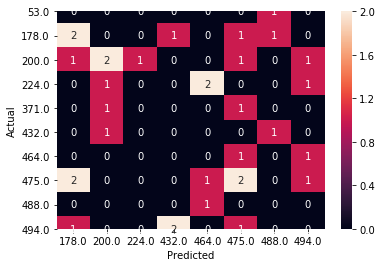

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

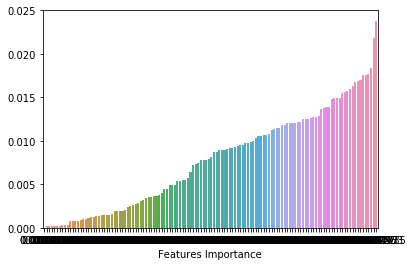

In [71]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [72]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

Accuracy:  21.21212121212121 %


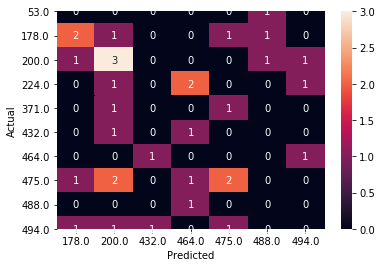

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [74]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 21.21212121212121 %


##### Polynomial Kernel


In [75]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 18.181818181818183 %


##### Sigmoid Kernel 

In [76]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 12.121212121212121 %


#### DECISION TREE

In [77]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 12.82051282051282 %


#### LOGISTIC REGRESSION 

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  18.181818181818183 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

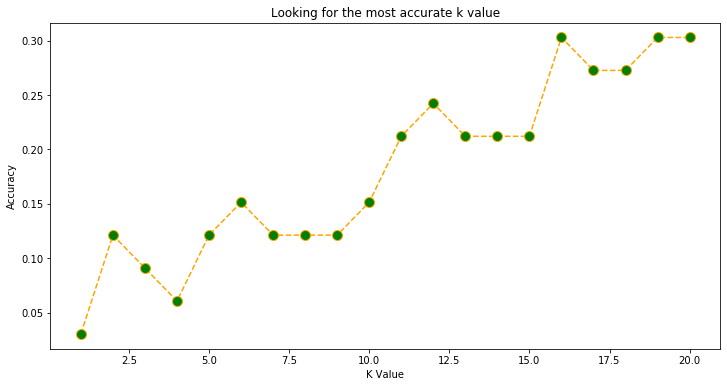

In [79]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [80]:
clf = KNeighborsClassifier(n_neighbors=16)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 30.303030303030305 %


### 7 MOST COMMON ODOR NAMES 

In [81]:
sensorama_7 = sensorama_7.sort_values('odor name')

In [84]:
sensorama2_7=[]

for i in range(16, len(sensorama_7)-16):
    if sensorama_7.iloc[i,4] == sensorama_7.iloc[i+16,4] or sensorama_7.iloc[i,4] == sensorama_7.iloc[i-16,4]:
        sensorama2_7.append(sensorama_7.iloc[i,:]) 

sensorama2_7= pd.DataFrame(sensorama2_7)
sensorama2_7

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
5411,31289.000000,2769.000000,0.346729,7.000000,178.000000,0.936567,-0.878056,-0.631781,-1.106175,-0.644741,...,-1.034147,-0.768084,-0.092074,0.000000,0.000000,-0.256623,0.536151,0.249830,-0.549258,-0.161598
2379,8842.000000,978.000000,0.277209,7.000000,178.000000,0.603735,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.757737,-0.431902,0.226252,0.000000,0.000000,0.063158,0.416447,0.132573,-0.121705,-0.161598
6098,61183.000000,1870.000000,-1.252222,7.000000,178.000000,0.884527,0.200130,-0.631781,0.632666,-0.644741,...,-0.513017,-0.480309,-0.410399,0.000000,0.000000,-0.548453,-0.973022,-0.756442,-0.788575,-0.161598
6625,61631.000000,2577.000000,0.277209,7.000000,178.000000,0.229345,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.527736,-0.431902,0.120143,0.000000,0.000000,0.008208,0.368912,0.087803,-0.103607,-0.161598
2086,8187.000000,267.000000,0.694326,7.000000,178.000000,0.331554,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.757737,-0.479776,0.332360,0.000000,0.000000,0.245087,0.898178,0.643714,0.055715,-0.161598
6857,61922.000000,519.000000,-1.599820,7.000000,178.000000,0.603735,-0.878056,-0.631781,-1.106175,-0.644741,...,-1.217987,-0.639196,-1.259267,0.000000,0.000000,-1.235979,-1.362598,-0.849689,-1.231642,-0.161598
13566,4682590.000000,497.000000,-1.182702,7.000000,200.000000,0.817511,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.665167,0.033167,-0.622616,0.000000,0.000000,-0.596416,-0.958380,-0.751608,-0.639120,-0.161598
13498,3354132.000000,1139.000000,-0.904624,7.000000,200.000000,-0.893823,0.200130,1.183366,0.632666,1.285620,...,1.251461,0.736149,-0.304291,0.000000,0.000000,-0.239546,-1.289458,-0.837396,-0.012849,-0.161598
1854,8052.000000,864.000000,-0.696065,7.000000,200.000000,0.728406,-0.878056,-0.631781,-1.106175,-0.644741,...,-1.264659,-0.960645,-0.940942,0.000000,0.000000,-1.133065,-0.642709,-0.623858,-1.346760,-0.161598
1357,7695.000000,559.000000,-0.626545,7.000000,200.000000,-1.268212,0.200130,1.183366,0.632666,1.285620,...,0.116880,-0.047847,-0.410399,0.000000,0.000000,-0.322448,-1.255593,-0.830881,0.030210,-0.161598


In [85]:
count=0
for i in range(1, len(sensorama2_7)):
    if sensorama2_7.iloc[i,4]!= sensorama2_7.iloc[i-1,4]:
        count = count +1
print(count)

7


In [86]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

#### RANDOM FOREST

Accuracy:  46.15384615384615 %


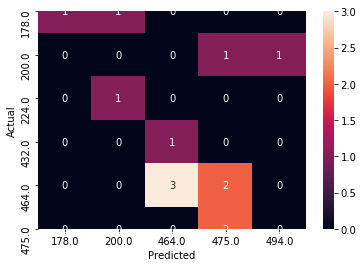

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

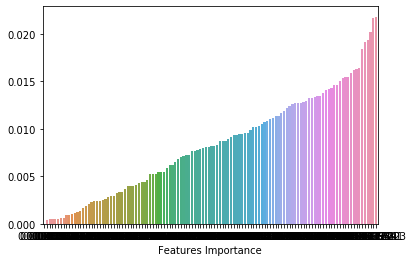

In [88]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [89]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

Accuracy:  38.46153846153847 %


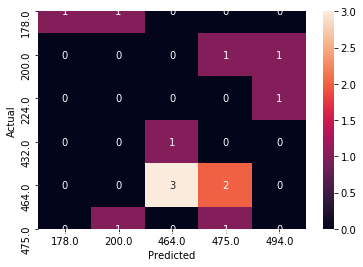

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [91]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 30.76923076923077 %


##### Polynomial Kernel


In [92]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 23.076923076923077 %


##### Sigmoid Kernel 

In [93]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 15.384615384615385 %


#### DECISION TREE

In [94]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 18.75 %


#### LOGISTIC REGRESSION 

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  30.76923076923077 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

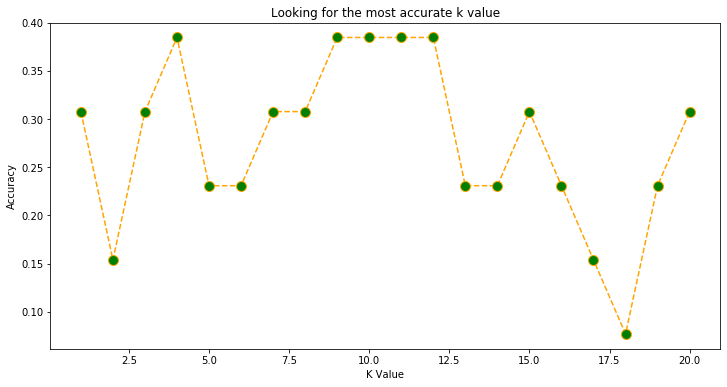

In [96]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [97]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 38.46153846153847 %


### 5 MOST COMMON ODOR NAMES 

In [99]:
sensorama_7 = sensorama_7.sort_values('odor name')

In [102]:
sensorama2_7=[]

for i in range(17 , len(sensorama_7)-17):
    if sensorama_7.iloc[i,4] == sensorama_7.iloc[i+17,4] or sensorama_7.iloc[i,4] == sensorama_7.iloc[i-17,4]:
        sensorama2_7.append(sensorama_7.iloc[i,:]) 

sensorama2_7= pd.DataFrame(sensorama2_7)
sensorama2_7

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
6857,61922.000000,519.000000,-1.599820,7.000000,178.000000,0.603735,-0.878056,-0.631781,-1.106175,-0.644741,...,-1.217987,-0.639196,-1.259267,0.000000,0.000000,-1.235979,-1.362598,-0.849689,-1.231642,-0.161598
2086,8187.000000,267.000000,0.694326,7.000000,178.000000,0.331554,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.757737,-0.479776,0.332360,0.000000,0.000000,0.245087,0.898178,0.643714,0.055715,-0.161598
2379,8842.000000,978.000000,0.277209,7.000000,178.000000,0.603735,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.757737,-0.431902,0.226252,0.000000,0.000000,0.063158,0.416447,0.132573,-0.121705,-0.161598
5411,31289.000000,2769.000000,0.346729,7.000000,178.000000,0.936567,-0.878056,-0.631781,-1.106175,-0.644741,...,-1.034147,-0.768084,-0.092074,0.000000,0.000000,-0.256623,0.536151,0.249830,-0.549258,-0.161598
12031,519382.000000,1155.000000,-0.070389,7.000000,200.000000,0.488423,0.200130,-0.631781,0.632666,-0.644741,...,0.624314,0.529302,0.756794,0.000000,0.000000,0.746787,0.547879,0.261667,0.548502,-0.161598
13361,3024003.000000,1685.000000,0.068650,7.000000,200.000000,-0.519433,1.278317,1.183366,2.371507,1.285620,...,0.301495,0.192587,0.014035,0.000000,0.000000,0.151311,-0.058067,-0.268770,0.378050,-0.161598
9031,93199.000000,427.000000,0.138170,7.000000,200.000000,-0.087388,0.200130,-0.631781,0.632666,-0.644741,...,0.117392,0.000560,0.544577,0.000000,0.000000,0.608945,0.918302,0.667335,0.639639,-0.161598
8952,92292.000000,1485.000000,0.346729,7.000000,200.000000,0.550197,1.278317,-0.631781,0.632666,-0.644741,...,2.236366,1.874028,0.862903,0.000000,0.000000,0.928716,0.588058,0.302686,0.721617,-0.161598
17967,73045098.000000,1537.000000,1.111444,7.000000,200.000000,1.102795,1.278317,-0.631781,0.632666,-0.644741,...,1.914058,1.489973,1.393445,0.000000,0.000000,1.386350,0.824135,0.558360,0.989337,-0.161598
6168,61235.000000,2608.000000,-0.000869,7.000000,200.000000,0.936567,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.850044,-0.768084,-0.092074,0.000000,0.000000,-0.256623,0.323113,0.045625,-0.555710,-0.161598


In [103]:
count=0
for i in range(1, len(sensorama2_7)):
    if sensorama2_7.iloc[i,4]!= sensorama2_7.iloc[i-1,4]:
        count = count +1
print(count)

6


In [104]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

#### RANDOM FOREST

Accuracy:  50.0 %


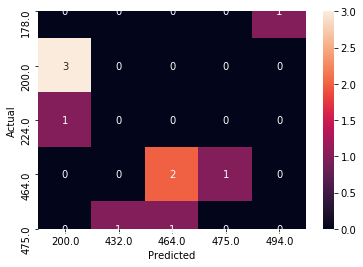

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

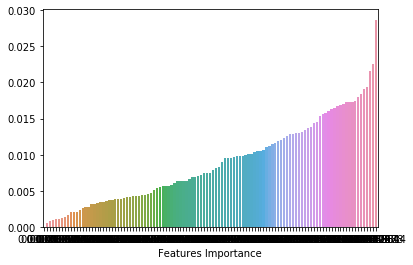

In [106]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [107]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

Accuracy:  60.0 %


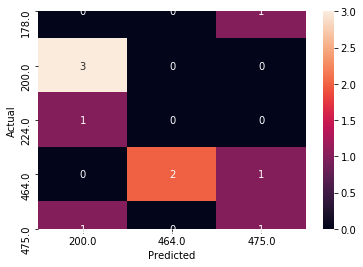

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [112]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 20.0 %


##### Polynomial Kernel


In [113]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 10.0 %


##### Sigmoid Kernel 

In [114]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 10.0 %


#### DECISION TREE

In [115]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 16.666666666666664 %


#### LOGISTIC REGRESSION 

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  20.0 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

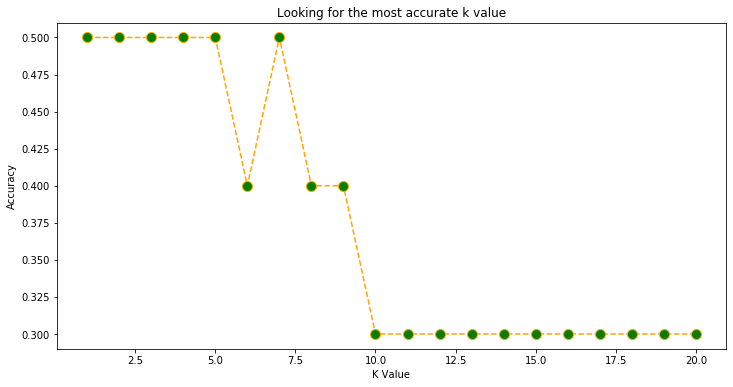

In [117]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [118]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 50.0 %


### 3 MOST COMMON ODOR NAMES 

In [119]:
sensorama_7 = sensorama_7.sort_values('odor name')

In [122]:
sensorama2_7=[]

for i in range(19 , len(sensorama_7)-19):
    if sensorama_7.iloc[i,4] == sensorama_7.iloc[i+19,4] or sensorama_7.iloc[i,4] == sensorama_7.iloc[i-19,4]:
        sensorama2_7.append(sensorama_7.iloc[i,:]) 

sensorama2_7= pd.DataFrame(sensorama2_7)
sensorama2_7

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
7099,62240.000000,1899.000000,0.902885,7.000000,200.000000,1.064608,0.200130,-0.631781,0.632666,-0.644741,...,1.038418,1.489440,1.075120,0.000000,0.000000,0.967541,0.777294,0.505634,0.574340,-0.161598
13566,4682590.000000,497.000000,-1.182702,7.000000,200.000000,0.817511,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.665167,0.033167,-0.622616,0.000000,0.000000,-0.596416,-0.958380,-0.751608,-0.639120,-0.161598
13498,3354132.000000,1139.000000,-0.904624,7.000000,200.000000,-0.893823,0.200130,1.183366,0.632666,1.285620,...,1.251461,0.736149,-0.304291,0.000000,0.000000,-0.239546,-1.289458,-0.837396,-0.012849,-0.161598
1854,8052.000000,864.000000,-0.696065,7.000000,200.000000,0.728406,-0.878056,-0.631781,-1.106175,-0.644741,...,-1.264659,-0.960645,-0.940942,0.000000,0.000000,-1.133065,-0.642709,-0.623858,-1.346760,-0.161598
9031,93199.000000,427.000000,0.138170,7.000000,200.000000,-0.087388,0.200130,-0.631781,0.632666,-0.644741,...,0.117392,0.000560,0.544577,0.000000,0.000000,0.608945,0.918302,0.667335,0.639639,-0.161598
13361,3024003.000000,1685.000000,0.068650,7.000000,200.000000,-0.519433,1.278317,1.183366,2.371507,1.285620,...,0.301495,0.192587,0.014035,0.000000,0.000000,0.151311,-0.058067,-0.268770,0.378050,-0.161598
12031,519382.000000,1155.000000,-0.070389,7.000000,200.000000,0.488423,0.200130,-0.631781,0.632666,-0.644741,...,0.624314,0.529302,0.756794,0.000000,0.000000,0.746787,0.547879,0.261667,0.548502,-0.161598
4400,19633.000000,387.000000,0.624807,7.000000,200.000000,-0.087388,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.343122,-0.047314,0.756794,0.000000,0.000000,0.746787,0.812546,0.545221,0.751145,-0.161598
7547,65428.000000,1634.000000,-0.209428,7.000000,464.000000,1.352513,1.278317,-0.631781,0.632666,-0.644741,...,2.434676,2.066056,1.075120,0.000000,0.000000,0.967541,-0.009977,-0.232705,0.549437,-0.161598
17000,11041412.000000,2134.000000,0.207689,7.000000,464.000000,0.331554,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.343633,-0.287748,0.438469,0.000000,0.000000,0.327989,0.657798,0.375596,0.202030,-0.161598


In [123]:
count=0
for i in range(1, len(sensorama2_7)):
    if sensorama2_7.iloc[i,4]!= sensorama2_7.iloc[i-1,4]:
        count = count +1
print(count)

3


In [139]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

#### RANDOM FOREST

Accuracy:  50.0 %


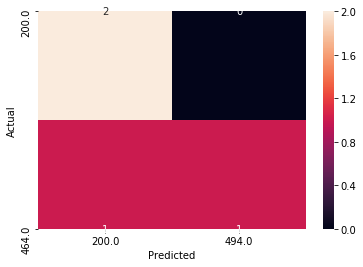

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

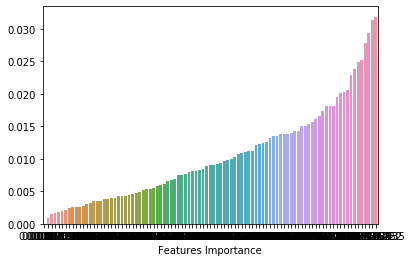

In [141]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [142]:
X = sensorama2_7[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_7['odor name']

Accuracy:  50.0 %


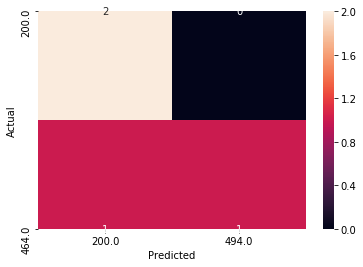

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [144]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 25.0 %


##### Polynomial Kernel


In [145]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 25.0 %


##### Sigmoid Kernel 

In [146]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 25.0 %


#### DECISION TREE

In [147]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 60.0 %


#### LOGISTIC REGRESSION 

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  25.0 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

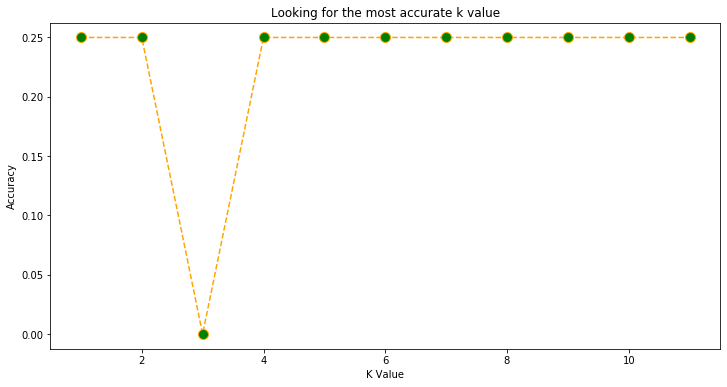

In [149]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,12):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 12), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [150]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 25.0 %
